# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


***Drive Mount***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***imort libraries***

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [3]:
con_data = pd.read_csv("/content/drive/MyDrive/deep learning assignment/compresive_strength_concrete.csv")

In [4]:
con_data.head(6)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


In [5]:
con_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
con_data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

***rename colums***

In [7]:
columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnance_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete_Strength'
    }
  
con_data.rename(columns = columns, inplace=True)

In [8]:
con_data.columns

Index(['Cement', 'Blast_Furnance_Slag', 'Fly_Ash', 'Water',
       'Super_Plasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_Strength'],
      dtype='object')

# Check Missing Values

In [9]:
con_data.isnull().sum()

Cement                 0
Blast_Furnance_Slag    0
Fly_Ash                0
Water                  0
Super_Plasticizer      0
Coarse_Aggregate       0
Fine_Aggregate         0
Age                    0
Concrete_Strength      0
dtype: int64

***Correlation***

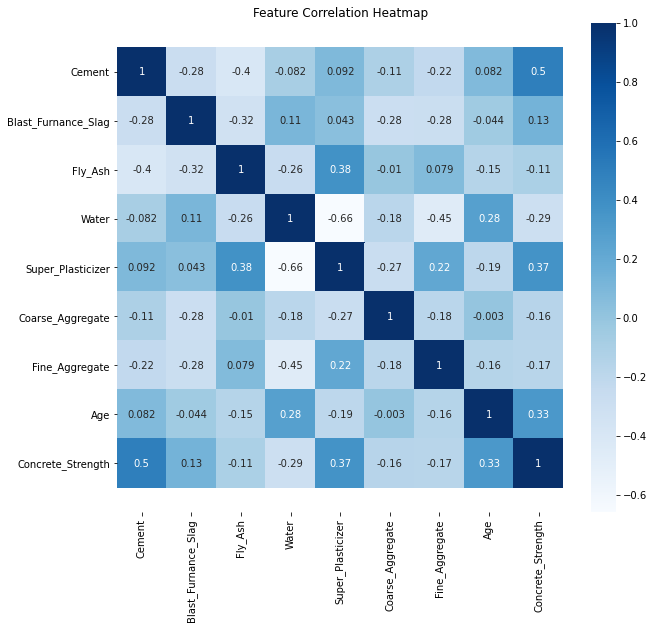

In [10]:
corr = con_data.corr()
plt.figure(figsize= (10,9))
sns.heatmap(corr, annot = True, cmap = 'Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Split Data

In [11]:
from sklearn.model_selection import train_test_split
x=con_data.iloc[:,:8]
y=con_data.iloc[:,-1]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=34)
x_train

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
132,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90
579,203.5,135.7,0.0,185.7,0.0,1076.2,759.3,28
15,380.0,0.0,0.0,228.0,0.0,932.0,670.0,90
255,212.5,0.0,100.4,159.3,8.7,1007.8,903.6,14
...,...,...,...,...,...,...,...,...
601,339.0,0.0,0.0,197.0,0.0,968.0,781.0,28
669,288.0,192.0,0.0,192.0,0.0,932.0,717.8,3
453,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,56
324,252.3,0.0,98.8,146.3,14.2,987.8,889.0,3


In [13]:
# Centeralized
mean = con_data.mean(axis=0)
con_data-= mean
std = con_data.std(axis=0)
con_data/= std 

# Model 
**relu & tanh**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers

In [15]:
network = models.Sequential()
network.add(layers.Dense (10, activation='relu',input_shape =(x_train.shape[1],)))
network.add(layers.Dense(8,activation='relu'))
network.add(layers.Dense(6,activation='tanh'))

In [16]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


# Compile

In [17]:
network.compile(optimizer='rmsprop',
                loss='mse',
                metrics= 'mae')

**Train**

In [18]:
network1= network.fit(x_train,y_train,epochs=100,validation_split=0.3, batch_size = 10)

Epoch 1/100
51/51 [==============================] - 1s 12ms/step - loss: 1634.5304 - mae: 36.7676 - val_loss: 1537.2657 - val_mae: 35.5857
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 1686.9401 - mae: 37.2312 - val_loss: 1537.2657 - val_mae: 35.5857
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 1676.8468 - mae: 36.9967 - val_loss: 1537.2657 - val_mae: 35.5857
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 1632.2452 - mae: 36.5921 - val_loss: 1537.2657 - val_mae: 35.5857
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 1534.1019 - mae: 35.3693 - val_loss: 1537.2657 - val_mae: 35.5857
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 1569.2306 - mae: 35.9501 - val_loss: 1537.2657 - val_mae: 35.5857
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 1605.4764 - mae: 36.6473 - val_loss: 1537.2657 - val_mae: 35.5857
Epoch 8/100
51/51 [=======

# Evaluation

In [19]:
evaluation = network.evaluate( x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1646.2579 - mae: 36.9475


# Prediction

In [20]:
prediction = network.predict(x_test)

In [21]:
prediction

array([[-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       ...,
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.]], dtype=float32)

In [22]:
y_test

816    42.42
735    40.86
463    56.06
169    65.20
634    24.50
       ...  
782    21.65
265    31.35
771    13.52
499    55.55
378    43.06
Name: Concrete_Strength, Length: 309, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
r2_score = regressor.score(x_test,y_test)
print(r2_score*100,'%')

59.22346750361906 %
